### Checking the integrity of training data generated by `DL_PREP.py`

In [ ]:
from py_env_train import *


In [2]:
#load the training data
files=sorted(os.listdir(TRAIN_FILES))
file=files[0]
#print(file)
train_files=np.load(TRAIN_FILES+"/"+file)

train_x=train_files["train_x"]
train_y=train_files["train_y"]
train_m=train_files["train_m"]
val_x=train_files["val_x"]
val_y=train_files["val_y"]
val_m=train_files["val_m"]
#canvas_x=train_files["canvas_x"]
#canvas_y=train_files["canvas_y"]
#canvas_m=train_files["canvas_m"]

print(file+ " Loaded!")

train_data_hourly_pr_['ADAPTER_DE05.day10.merged.nc']_['ADAPTER_DE05.day01.merged.nc']_MM_6__spatiotemporal_128.256_2018-01-01T13_2022-12-31T23_no_na_land.npz Loaded!


### 1. Check the shapes and peek into data:

In [3]:
import matplotlib.pyplot as plt

# Check shape of training and validation data
print("Shape of train_x:", train_x.shape)
print("Shape of train_y:", train_y.shape)
print("Shape of train_m:", train_m.shape)
print("Shape of val_x:", val_x.shape)
print("Shape of val_y:", val_y.shape)
print("Shape of val_m:", val_m.shape)

train_x[:3, 125, 100, 6]


print ("checking minimum maximum values")

print("minimum train_x: " + str(np.nanmin(train_x[:, ..., 0])))
print("maximum train_x: " + str(np.nanmax(train_x[:, ..., 0])))
print("minimum train_y: " + str(np.nanmin(train_y[:, ..., 0])))
print("maximum train_y: " + str(np.nanmax(train_y[:, ..., 0])))
print("minimum train_m: " + str(np.nanmin(train_m[:, ..., 0])))
print("maximum train_m: " + str(np.nanmax(train_m[:, ..., 0])))
print("minimum val_x: " + str(np.nanmin(val_x[:, ..., 0])))
print("maximum val_x: " + str(np.nanmax(val_x[:, ..., 0])))
print("minimum val_y: " + str(np.nanmin(val_y[:, ..., 0])))
print("maximum val_y: " + str(np.nanmax(val_y[:, ..., 0])))
print("minimum val_m: " + str(np.nanmin(val_m[:, ..., 0])))
print("maximum val_m: " + str(np.nanmax(val_m[:, ..., 0])))
#print("minimum canvas_x: " + str(np.nanmin(canvas_x[:, ..., 0])))
#print("maximum canvas_x: " + str(np.nanmax(canvas_x[:, ..., 0])))
#print("minimum canvas_y: " + str(np.nanmin(canvas_y[:, ..., 0])))
#print("maximum canvas_y: " + str(np.nanmax(canvas_y[:, ..., 0])))
#print("minimum canvas_m: " + str(np.nanmin(canvas_m[:, ..., 0])))
#print("maximum canvas_m: " + str(np.nanmax(canvas_m[:, ..., 0])))
#print("average canvas_m: " + str(np.nanmean(canvas_m[:, ..., 0])))

Shape of train_x: (3634, 128, 256, 7)
Shape of train_y: (3634, 128, 256, 1)
Shape of train_m: (3634, 128, 256, 1)
Shape of val_x: (3630, 128, 256, 7)
Shape of val_y: (3630, 128, 256, 1)
Shape of val_m: (3630, 128, 256, 1)
checking minimum maximum values
minimum train_x: 0.0
maximum train_x: 0.7417
minimum train_y: -1.0
maximum train_y: 1.0
minimum train_m: 0.0
maximum train_m: 1.0
minimum val_x: 0.0
maximum val_x: 1.0
minimum val_y: -1.264
maximum val_y: 1.299
minimum val_m: 0.0
maximum val_m: 1.0


### 2. Check maps of channels in a time_index

#### 2.1. train_x

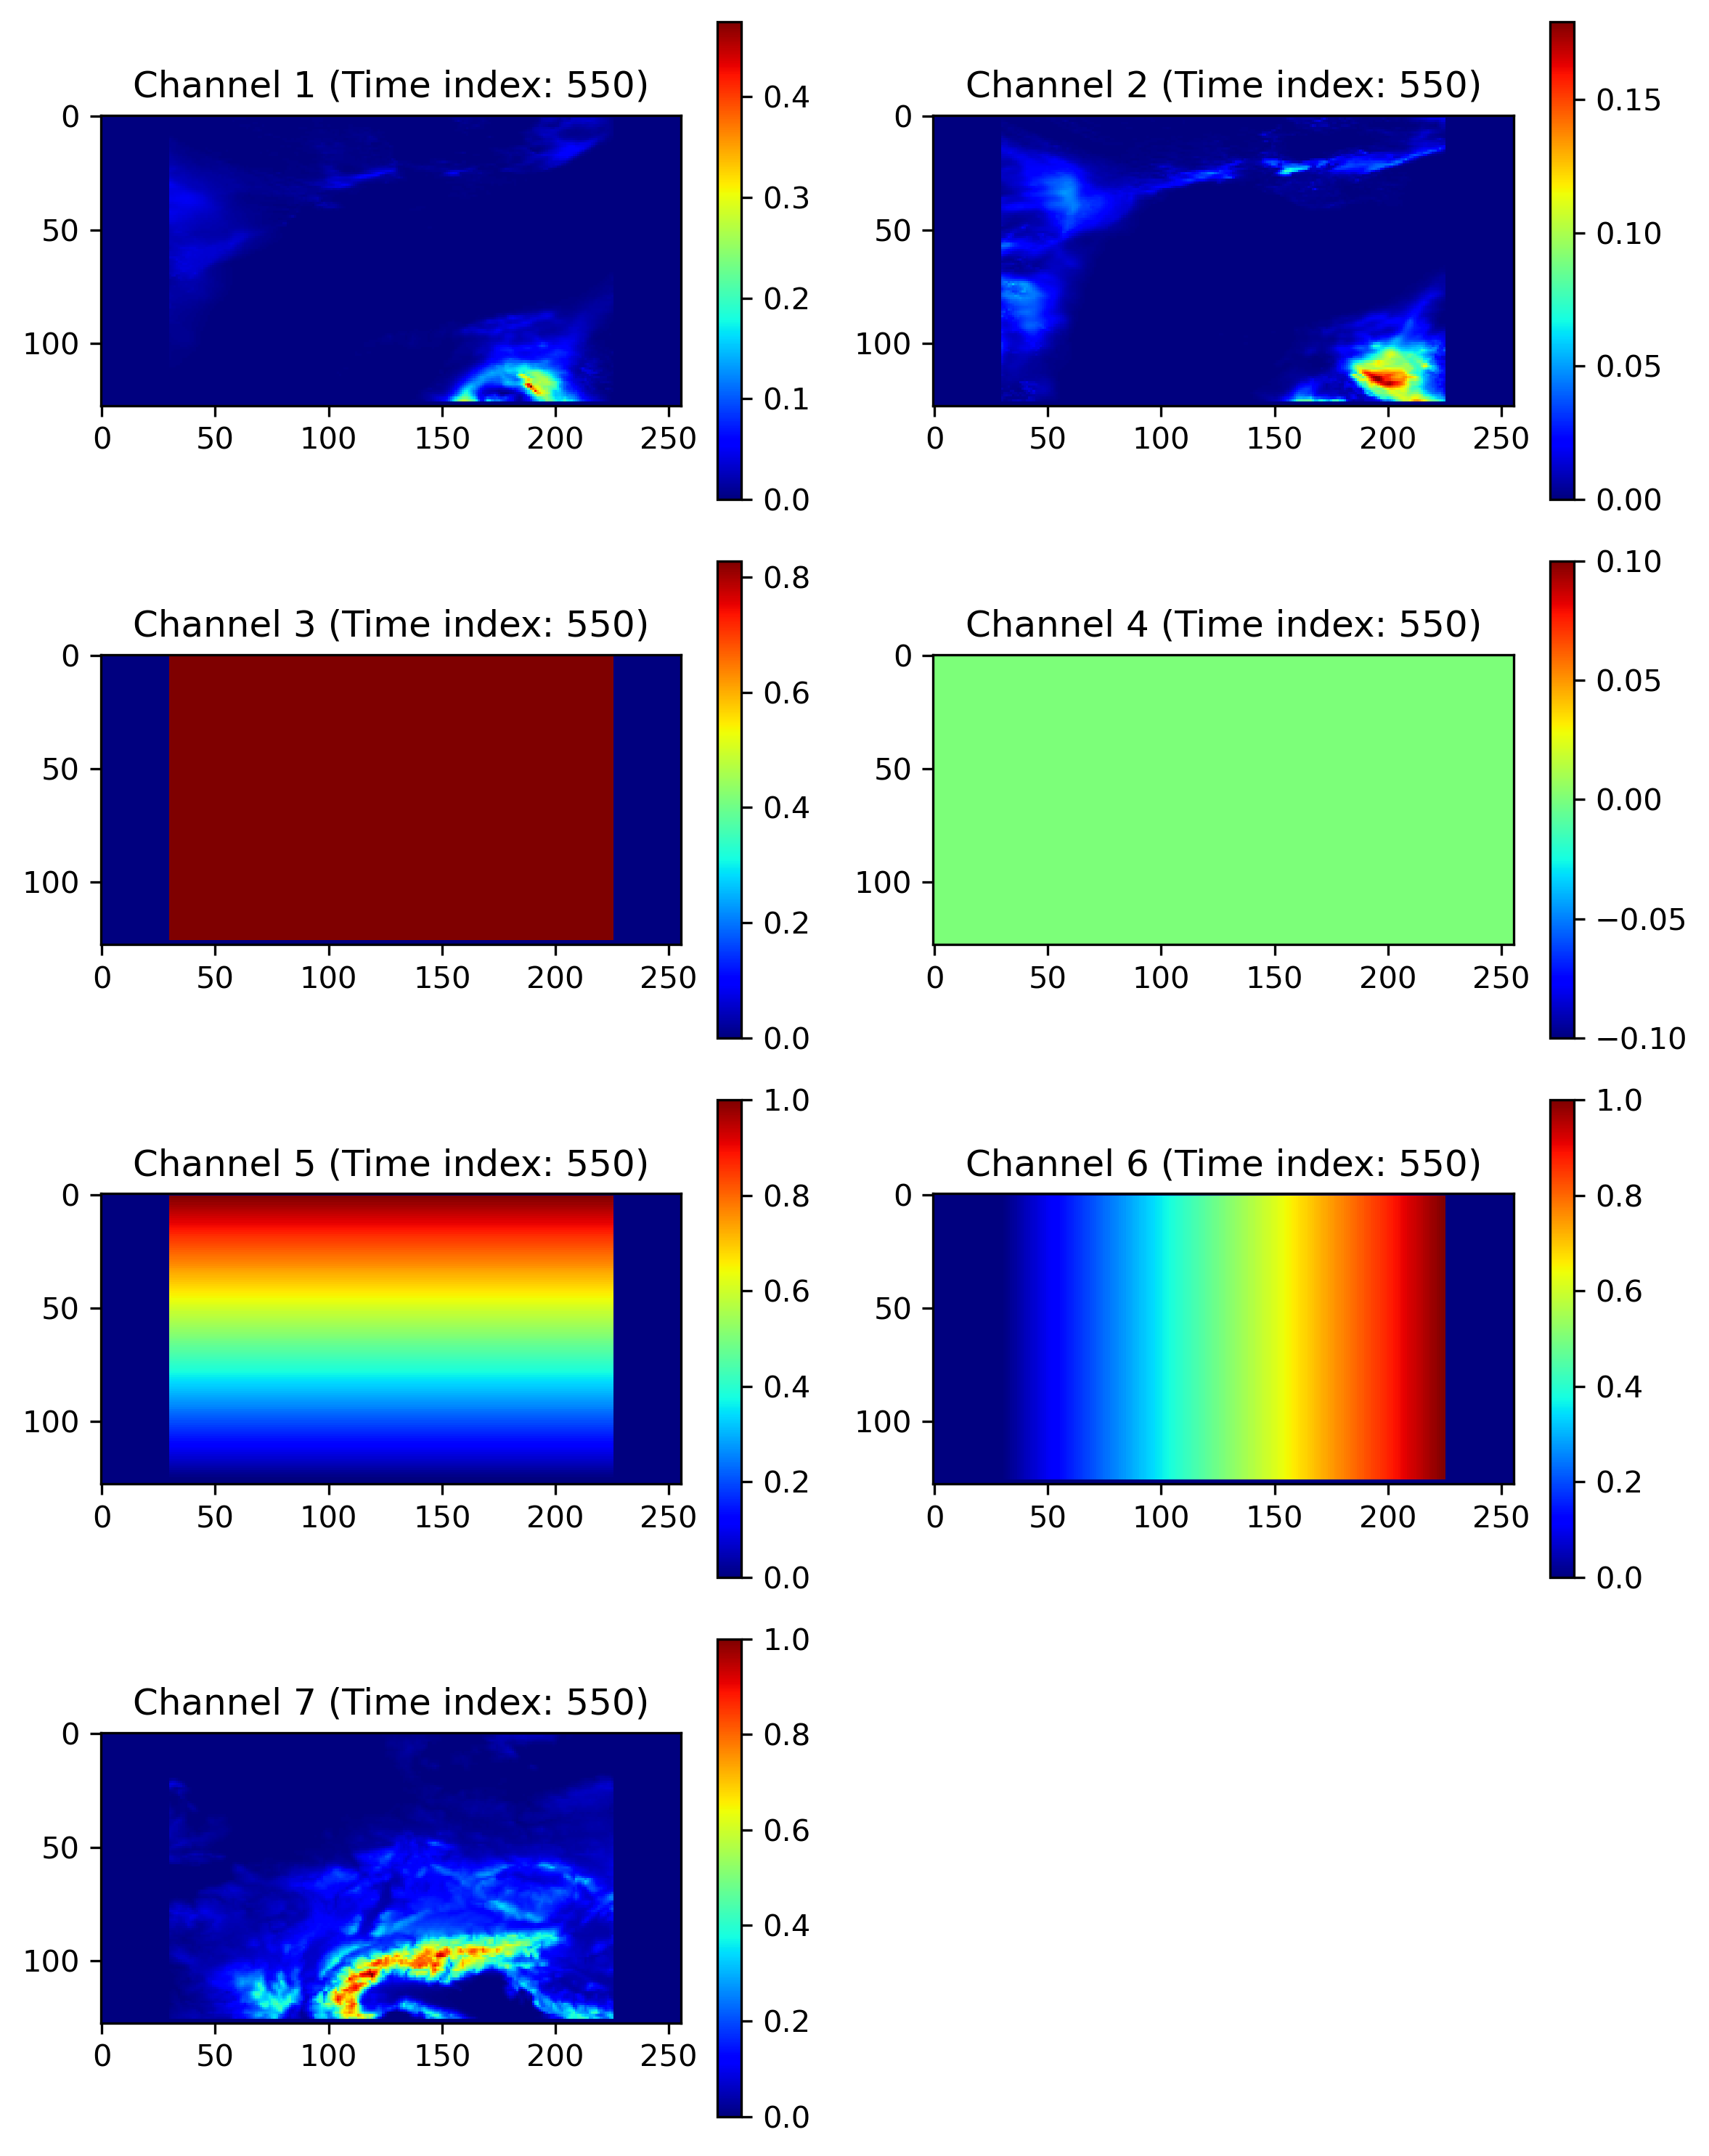

In [9]:
import matplotlib.pyplot as plt

n_channels=7

# Close all previously opened figures
plt.close('all')

# Specify the time index for the example maps
time_index = 550

# Set the number of columns for the panel
n_columns = 2

# Calculate the number of rows needed based on the number of channels
n_rows = (n_channels + n_columns - 1) // n_columns

# Create the panel of subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(8, 10), dpi=300)

# Flatten the axes array if it has more than one dimension
if n_rows > 1:
    axes = axes.flatten()

# Plot example maps for each channel
for channel_idx in range(n_channels):
    # Select the current axis for the subplot
    ax = axes[channel_idx]

    # Get channel data
    channel_data = train_x[time_index, :, :, channel_idx]

    # Plot the channel map
    im = ax.imshow(channel_data, cmap='jet')
    ax.set_title(f"Channel {channel_idx+1} (Time index: {time_index})")
    plt.colorbar(im, ax=ax)

# Hide any empty subplots
for i in range(n_channels, n_rows * n_columns):
    axes[i].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

# Display the panel of subplots
plt.show()


#### 2.2. val_x

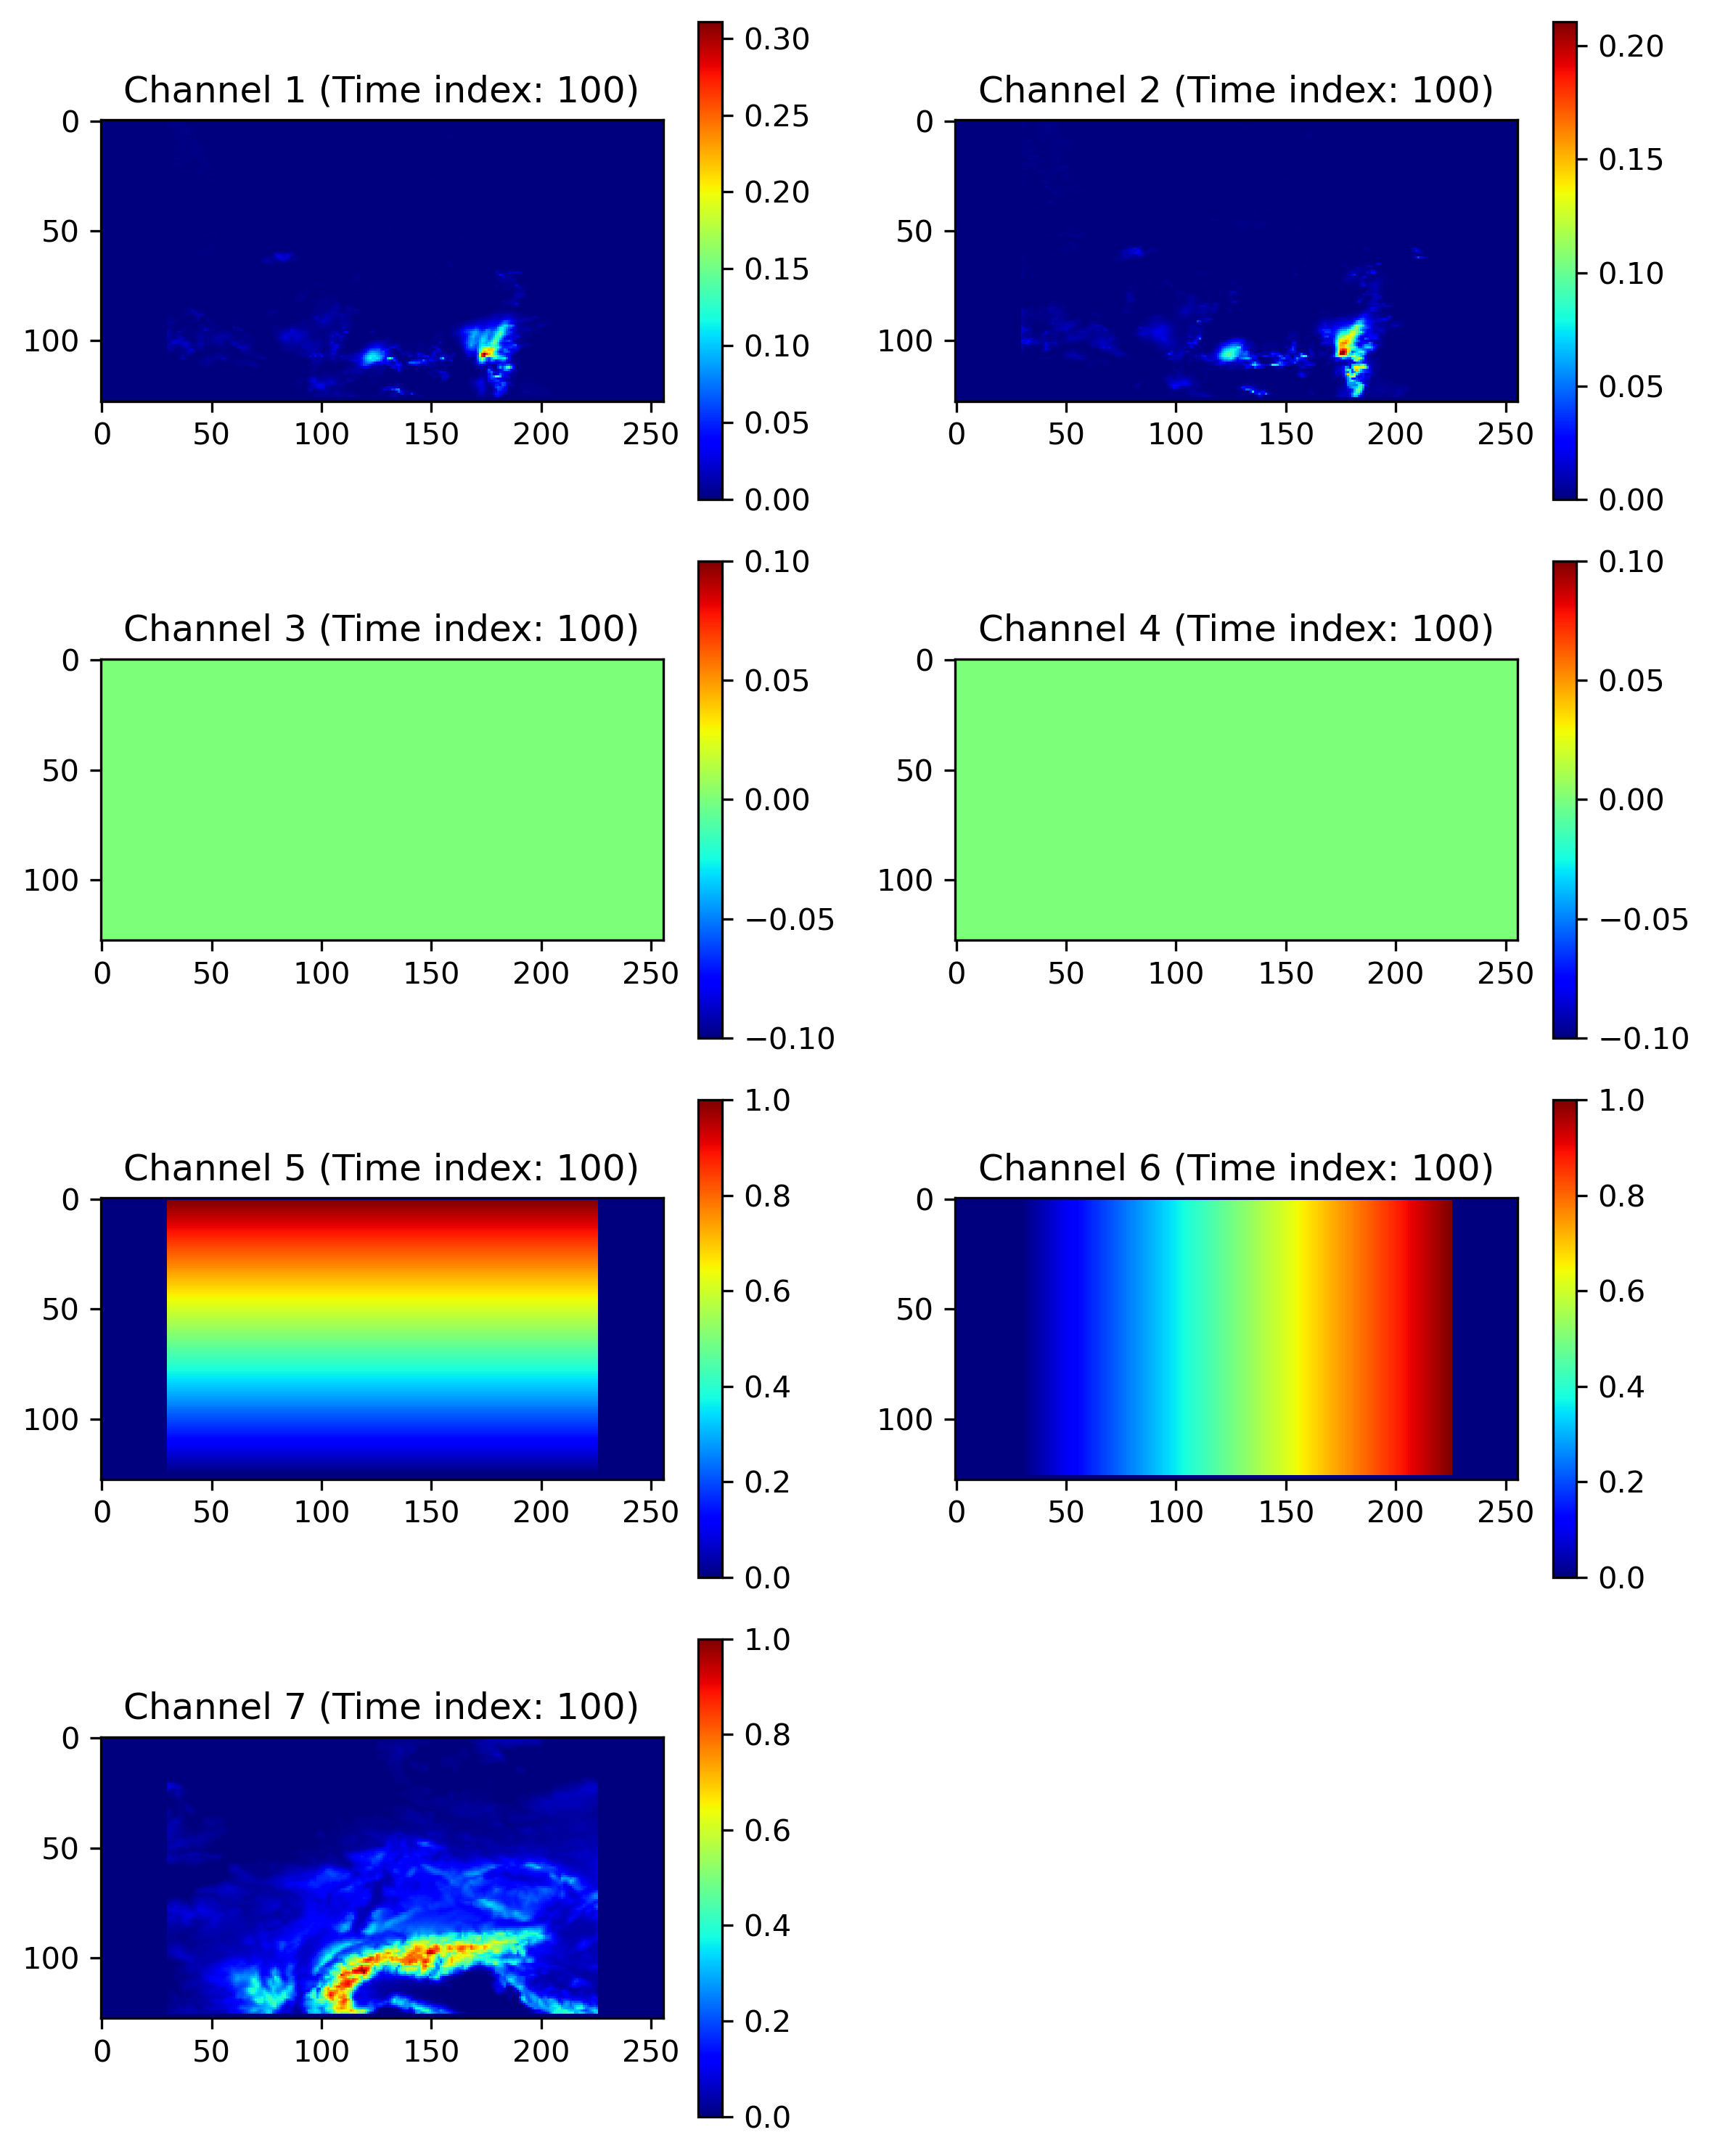

In [17]:
import matplotlib.pyplot as plt

# Close all previously opened figures
plt.close('all')

# Specify the time index for the example maps
time_index = 100

# Set the number of columns for the panel
n_columns = 2

# Calculate the number of rows needed based on the number of channels
n_rows = (n_channels + n_columns - 1) // n_columns

# Create the panel of subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(8, 10), dpi=300)

# Flatten the axes array if it has more than one dimension
if n_rows > 1:
    axes = axes.flatten()

# Plot example maps for each channel
for channel_idx in range(n_channels):
    # Select the current axis for the subplot
    ax = axes[channel_idx]

    # Get channel data
    channel_data = val_x[time_index, :, :, channel_idx]

    # Plot the channel map
    im = ax.imshow(channel_data, cmap='jet')
    ax.set_title(f"Channel {channel_idx+1} (Time index: {time_index})")
    plt.colorbar(im, ax=ax)

# Hide any empty subplots
for i in range(n_channels, n_rows * n_columns):
    axes[i].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

# Display the panel of subplots
plt.show()


### 3. Check precipitation numbers (float16):

#### 3.1 train_x

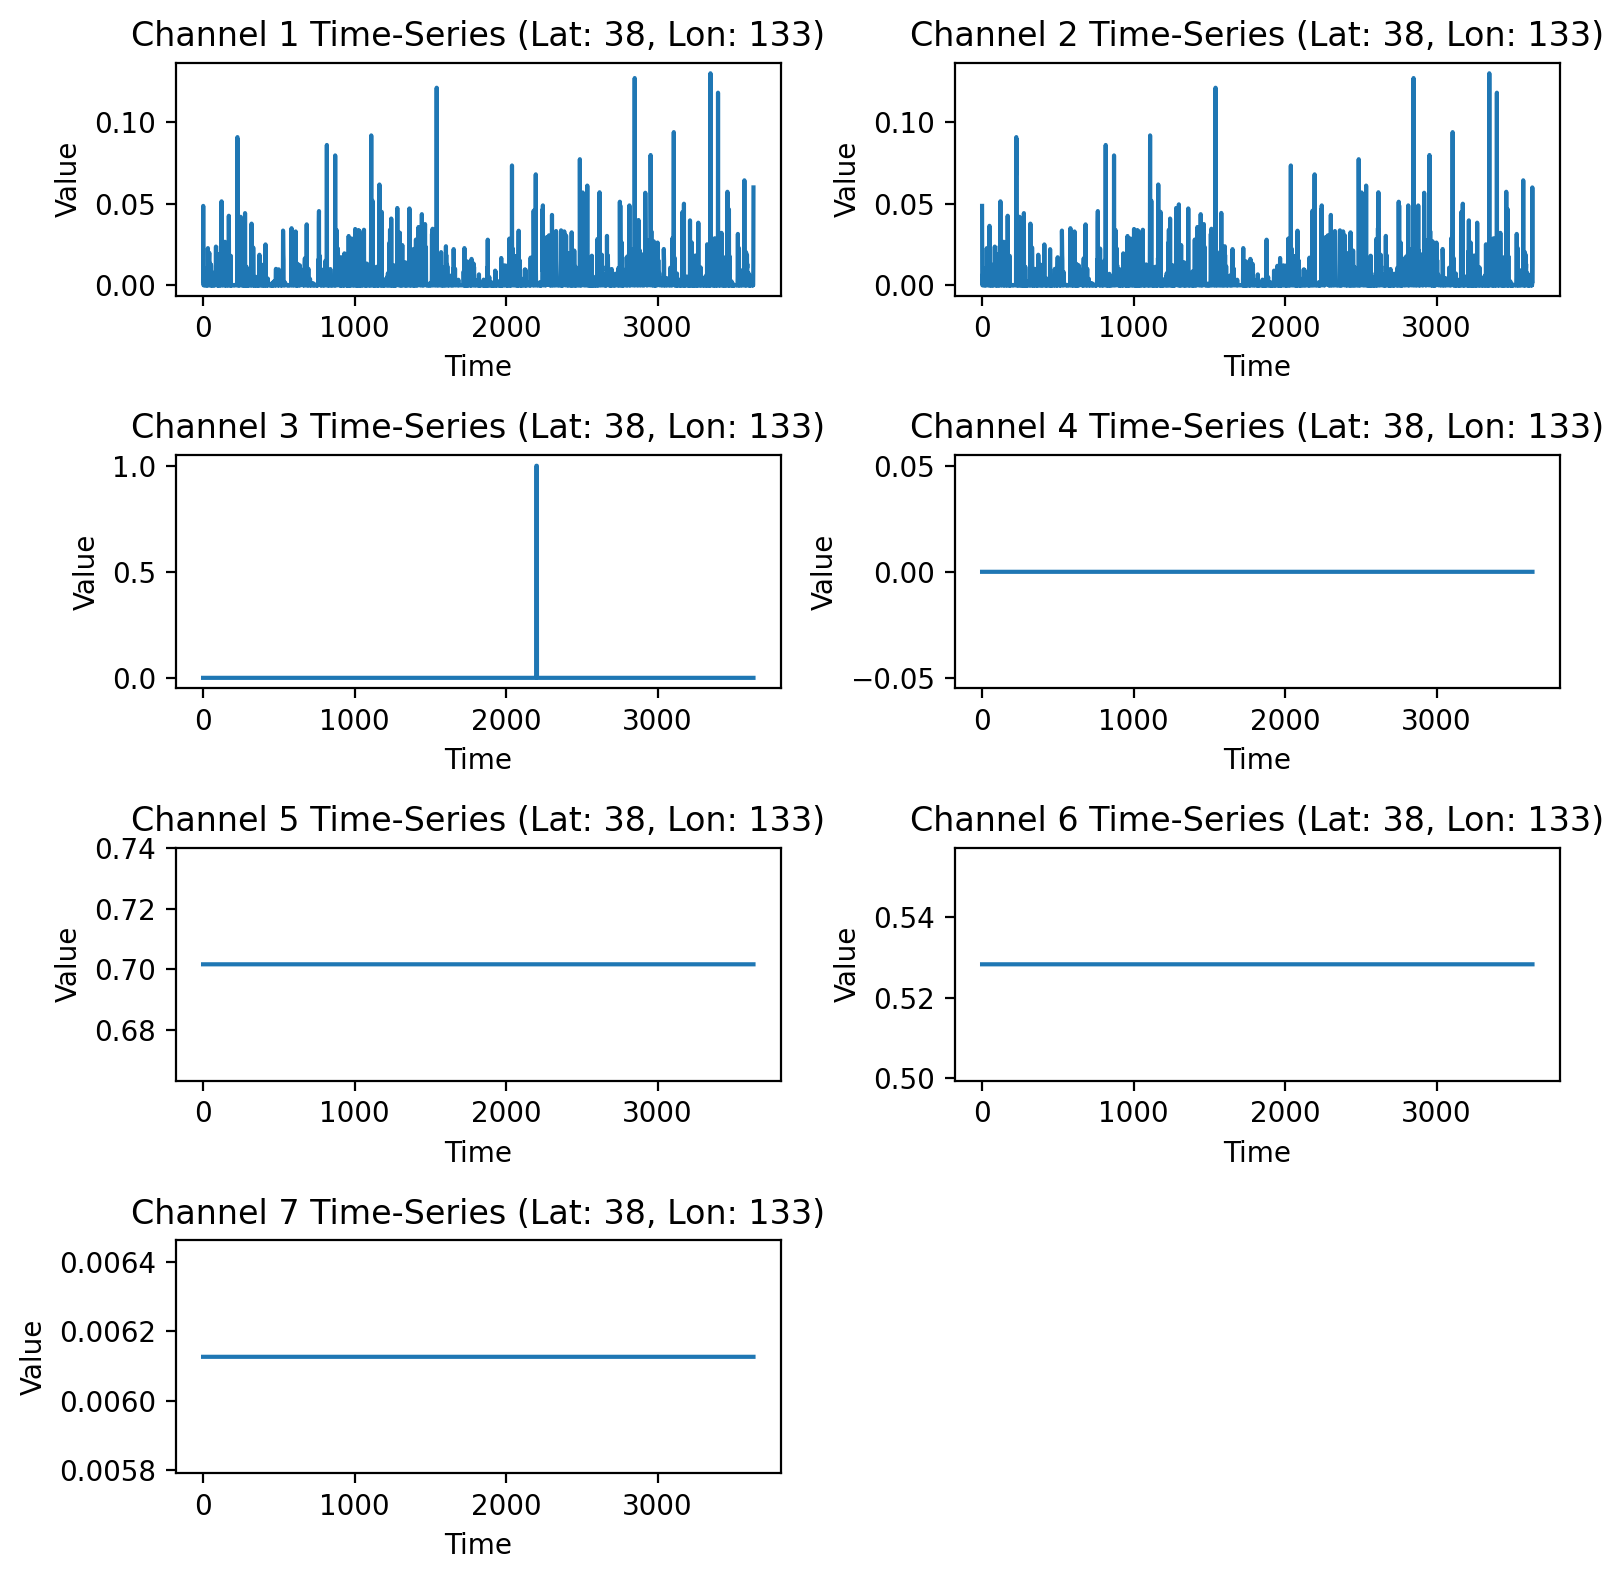

In [6]:
import random
import matplotlib.pyplot as plt

# Set a seed for reproducibility
random.seed(20)

# Select a random pixel (latitude and longitude)
random_lat = random.randint(0, train_x.shape[1]-1)
random_lon = random.randint(0, train_x.shape[2]-1)

# Set the number of columns for the panel
n_columns = 2

# Calculate the number of rows needed based on the number of channels
n_rows = (n_channels + n_columns - 1) // n_columns

# Create the panel of subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(8, 8), dpi=200)

# Flatten the axes array if it has more than one dimension
if n_rows > 1:
    axes = axes.flatten()

# Plot time-series for the random pixel in all channels
for channel_idx in range(n_channels):
    # Select the current axis for the subplot
    ax = axes[channel_idx]

    # Get channel data
    channel_data = train_x[:, random_lat, random_lon, channel_idx]

    # Plot the channel time-series
    ax.plot(channel_data)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.set_title(f"Channel {channel_idx+1} Time-Series (Lat: {random_lat}, Lon: {random_lon})")

# Hide any empty subplots
for i in range(n_channels, n_rows * n_columns):
    axes[i].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

# Display the panel of subplots
plt.show()


#### 3.2 val_x

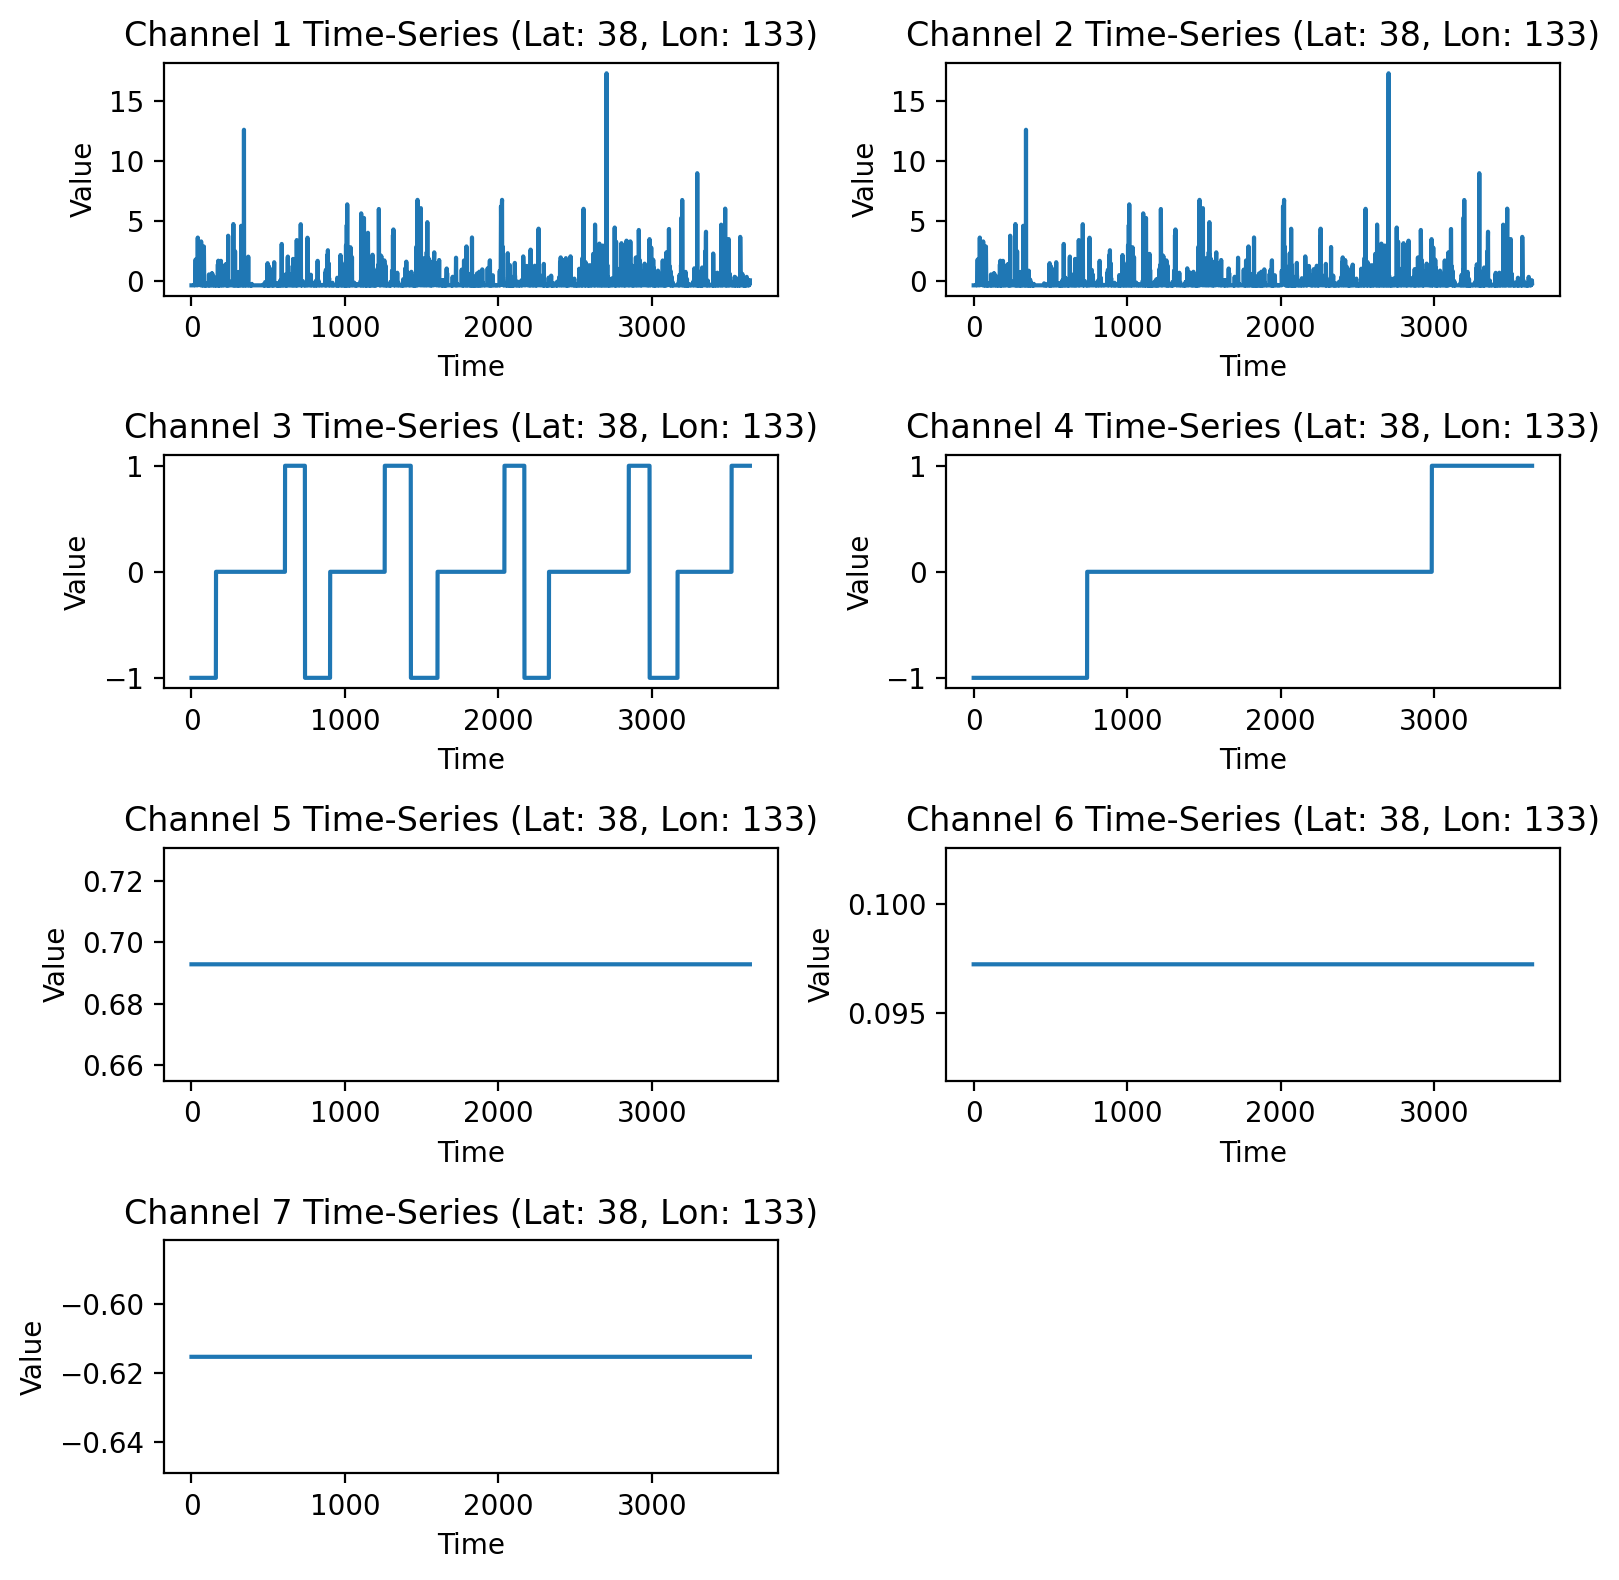

In [10]:
import random
import matplotlib.pyplot as plt

# Set a seed for reproducibility
random.seed(20)

# Select a random pixel (latitude and longitude)
random_lat = random.randint(0, train_x.shape[1]-1)
random_lon = random.randint(0, train_x.shape[2]-1)

# Set the number of columns for the panel
n_columns = 2

# Calculate the number of rows needed based on the number of channels
n_rows = (n_channels + n_columns - 1) // n_columns

# Create the panel of subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(8, 8), dpi=200)

# Flatten the axes array if it has more than one dimension
if n_rows > 1:
    axes = axes.flatten()

# Plot time-series for the random pixel in all channels
for channel_idx in range(n_channels):
    # Select the current axis for the subplot
    ax = axes[channel_idx]

    # Get channel data
    channel_data = val_x[:, random_lat, random_lon, channel_idx]

    # Plot the channel time-series
    ax.plot(channel_data)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.set_title(f"Channel {channel_idx+1} Time-Series (Lat: {random_lat}, Lon: {random_lon})")

# Hide any empty subplots
for i in range(n_channels, n_rows * n_columns):
    axes[i].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

# Display the panel of subplots
plt.show()


### 4. Check train/val indices:

In [23]:
train_indices_path = PPROJECT_DIR + '/AI MODELS/00-UNET/' + data_unique_name + "_train_indices.npy"
val_indices_path = PPROJECT_DIR + '/AI MODELS/00-UNET/' + data_unique_name + "_val_indices.npy"

total_ind = np.arange(train_x.shape[0]+val_x.shape[0])
train_indices = np.load(train_indices_path)
val_indices = np.load(val_indices_path)

plt.plot(total_ind[train_indices], train_indices, '.', ms=1)
plt.plot(total_ind[val_indices], val_indices, '.', ms=1)

print("train_indices:")
print(train_indices)
print("val_indices:")
print(val_indices)

NameError: name 'data_unique_name' is not defined

### 5. Check mask values:

#### 5.1 train_m

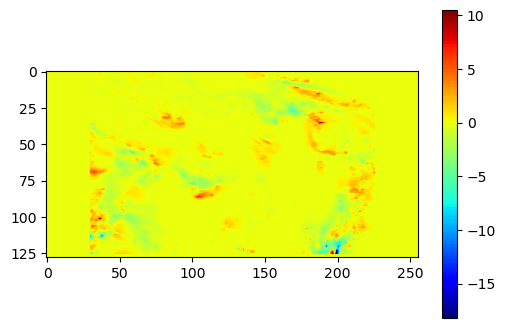

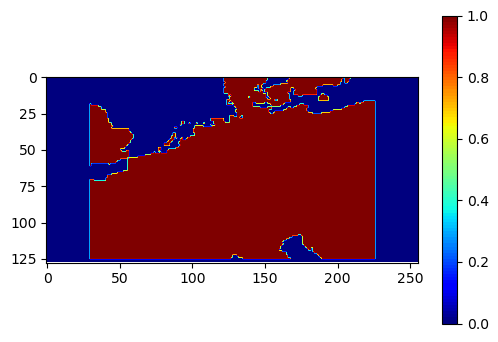

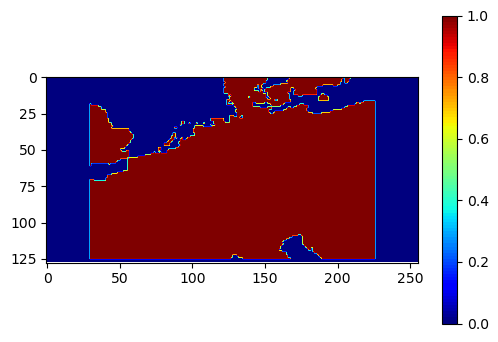

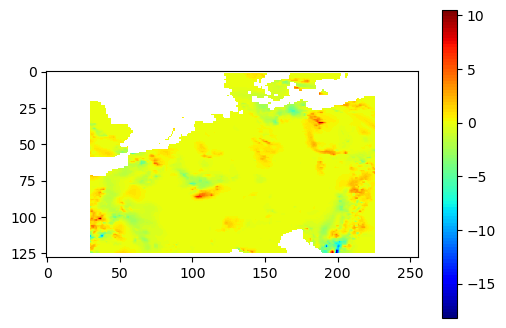

In [12]:
plt.close('all')  # Close the figure explicitly

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the number of segments for the custom colormap
num_segments = 100
# Create a custom colormap with reduced segments based on 'jet' colormap
jet_segments = ListedColormap(plt.cm.jet(np.linspace(0, 1, num_segments)))

# Plot example maps for each channel
time_index = 100  # Specify the time index for the example maps
#mask_data = np.nanmean(train_m[..., :, :, 0], axis=0)
mask_data = train_m[time_index, :, :, 0]
channel_data = train_y[time_index, :, :, 0]
mean_mask = np.nanmean(train_m[:, :, :, 0], axis=0)
nan_ind = mask_data==0
mask_data_nanreplaced = mask_data*1
mask_data_nanreplaced[nan_ind]=np.nan

plt.figure(dpi=100, figsize=(6,4))
plt.imshow(channel_data, cmap=jet_segments)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mask_data, cmap= jet_segments)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mean_mask, cmap=jet_segments)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mask_data_nanreplaced*channel_data, cmap=jet_segments)
plt.colorbar()
plt.show()

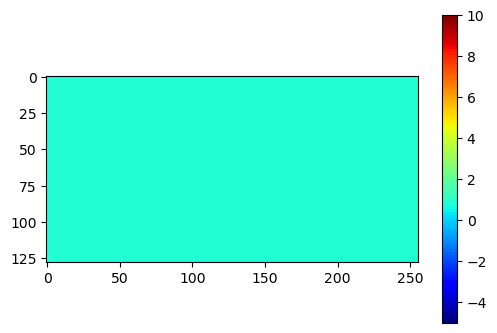

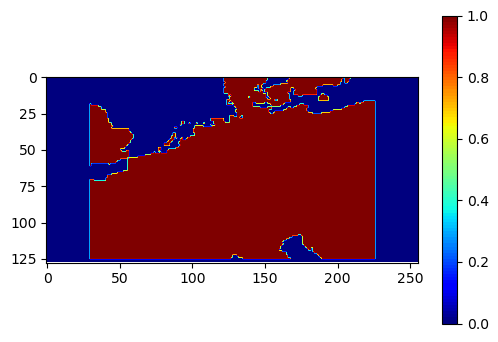

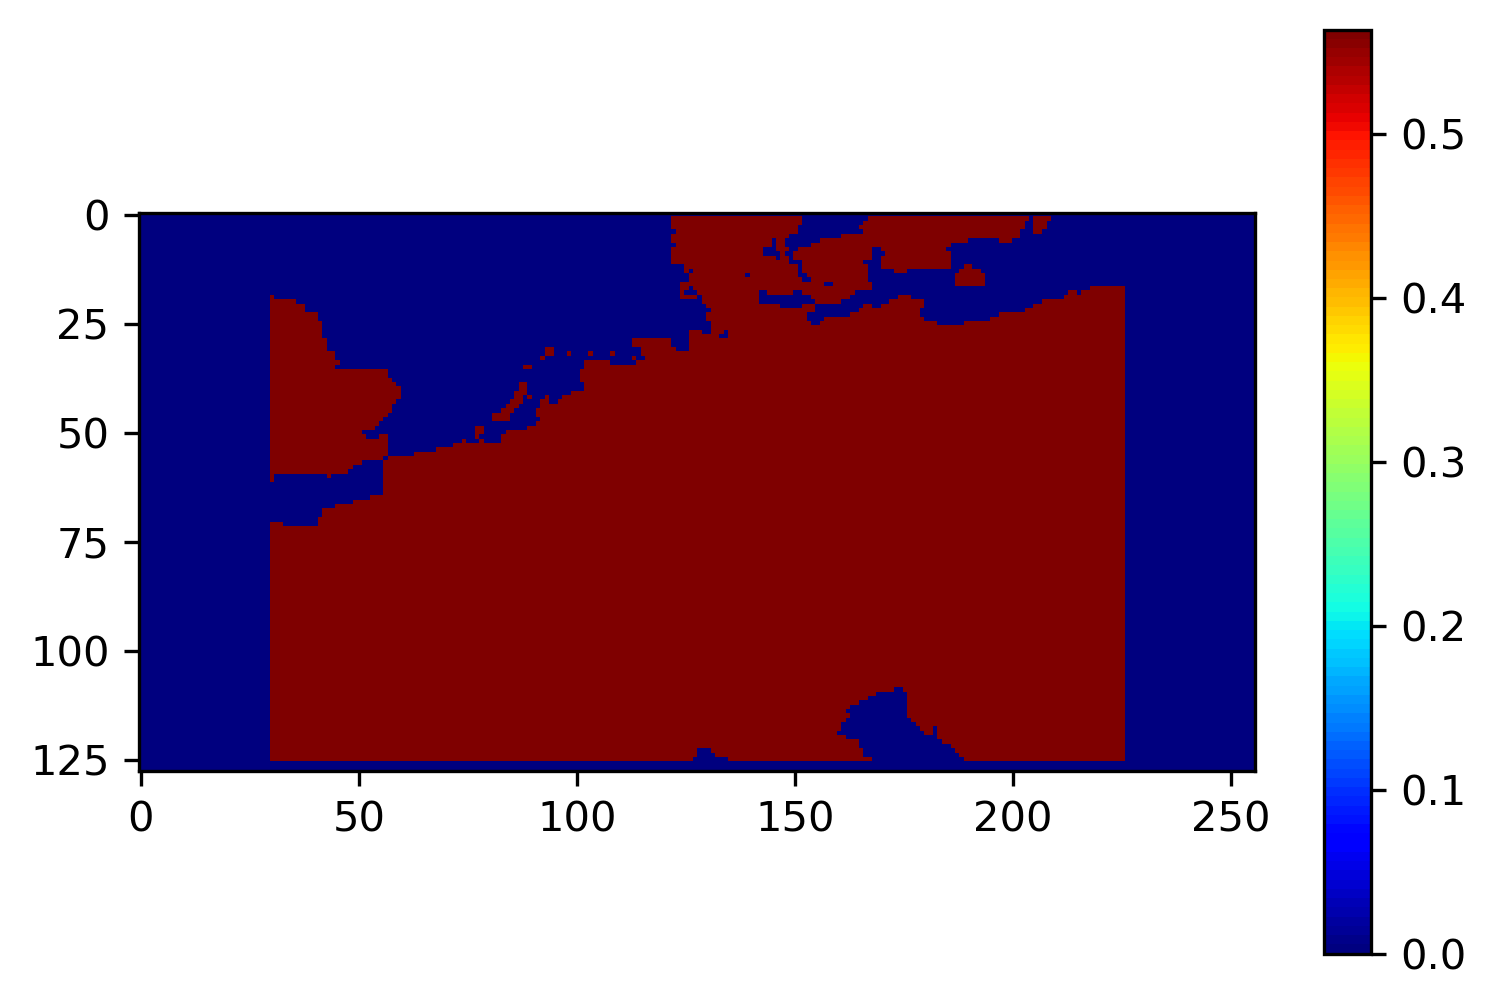

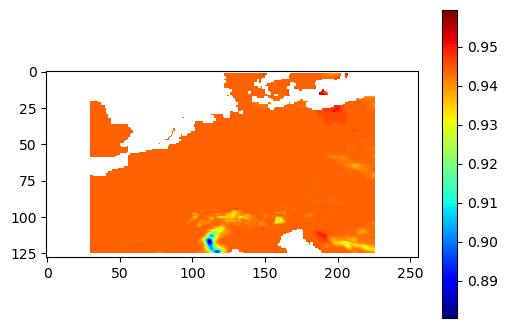

In [12]:
plt.close('all')  # Close the figure explicitly

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the number of segments for the custom colormap
num_segments = 100
# Create a custom colormap with reduced segments based on 'jet' colormap
jet_segments = ListedColormap(plt.cm.jet(np.linspace(0, 1, num_segments)))

# Plot example maps for each channel
time_index = 100  # Specify the time index for the example maps
#mask_data = np.nanmean(train_m[..., :, :, 0], axis=0)
mask_data = train_m[time_index, :, :, 0]
channel_data = train_y[time_index, :, :, 0]
mean_mask = np.nanmean(train_m[:, :, :, 0], axis=0)
nan_ind = mask_data==0
mask_data_nanreplaced = mask_data*1
mask_data_nanreplaced[nan_ind]=np.nan

plt.figure(dpi=100, figsize=(6,4))
plt.imshow(channel_data, cmap=jet_segments, vmin=-5, vmax=10)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mask_data, cmap= jet_segments)
plt.colorbar()
plt.show()
plt.figure(dpi=300, figsize=(6,4))
plt.imshow(mean_mask, cmap=jet_segments)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mask_data_nanreplaced*channel_data, cmap=jet_segments)
plt.colorbar()
plt.show()

In [84]:
xlat=50
ylon=180

A=train_y[:, xlat, ylon]==-999.
B=train_m[:, xlat, ylon]==0

print(np.sum(A) == np.sum(B))
print(np.sum(A))

True
315


#### 5.2 val_m

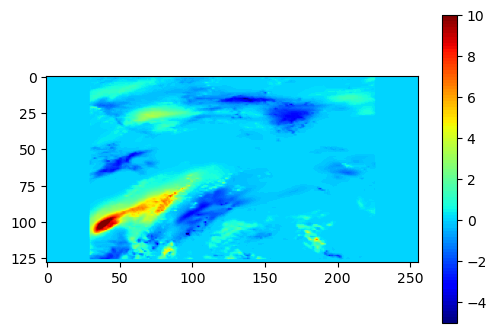

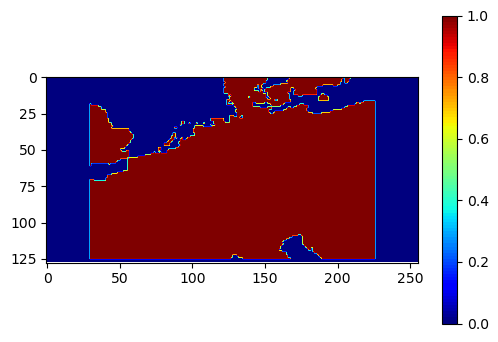

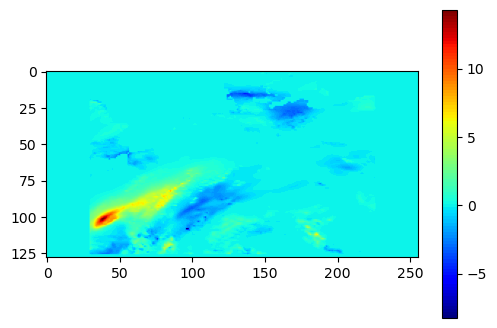

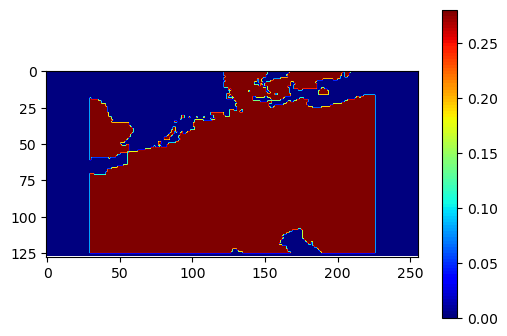

In [47]:
plt.close('all')  # Close the figure explicitly

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the number of segments for the custom colormap
num_segments = 100
# Create a custom colormap with reduced segments based on 'jet' colormap
jet_segments = ListedColormap(plt.cm.jet(np.linspace(0, 1, num_segments)))

# Plot example maps for each channel
time_index = 2  # Specify the time index for the example maps
#mask_data = np.nanmean(train_m[.., :, :, 0], axis=0)
mask_data = val_m[time_index, :, :, 0]
channel_data = val_y[time_index, :, :, 0]
mean_mask = np.nanmean(val_m[:, :, :, 0], axis=0)
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(channel_data, cmap=jet_segments, vmin=-5, vmax=10)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mask_data, cmap= jet_segments)
plt.colorbar()
plt.show()

plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mask_data*channel_data, cmap=jet_segments)
plt.colorbar()
plt.show()
plt.figure(dpi=100, figsize=(6,4))
plt.imshow(mean_mask, cmap=jet_segments)
plt.colorbar()
plt.show()

In [29]:
xlat=50
ylon=180

A=val_y[:, xlat, ylon]==-999.
B=val_m[:, xlat, ylon]==0

print(np.sum(A) == np.sum(B))
print(np.sum(A))

True
0


### 6. How to process the data temporal resolution?

Defined a function named "HRES_NETCDF_LEADTIME_TRAIN_PREPROCESS" to preprocess the time scale of the training data.

In [39]:
import xarray as xr
import matplotlib.pyplot as plt
date_start = "2018-01-01T13"
date_end = "2022-12-31T23"
# Load the datasets
data_day01 = xr.open_dataset(HRES_PREP + "/ADAPTER_DE05.day01.merged.nc").sel(time=slice(date_start, date_end))
data_day10 = xr.open_dataset(HRES_PREP + "/ADAPTER_DE05.day10.merged.nc").sel(time=slice(date_start, date_end))

In [ ]:
# Resample the hourly data to 3-hourly intervals
data_day01_resampled = data_day01.resample(time="3H").sum()

# Align the resampled data_day01 with data_day05
data_day01_aligned, data_day05_aligned = xr.align(data_day01_resampled, data_day05, join='inner')

# Interpolate data_day01 to match the time coordinates of data_day05
day01_interp = data_day01.interp(time=data_day05.time)

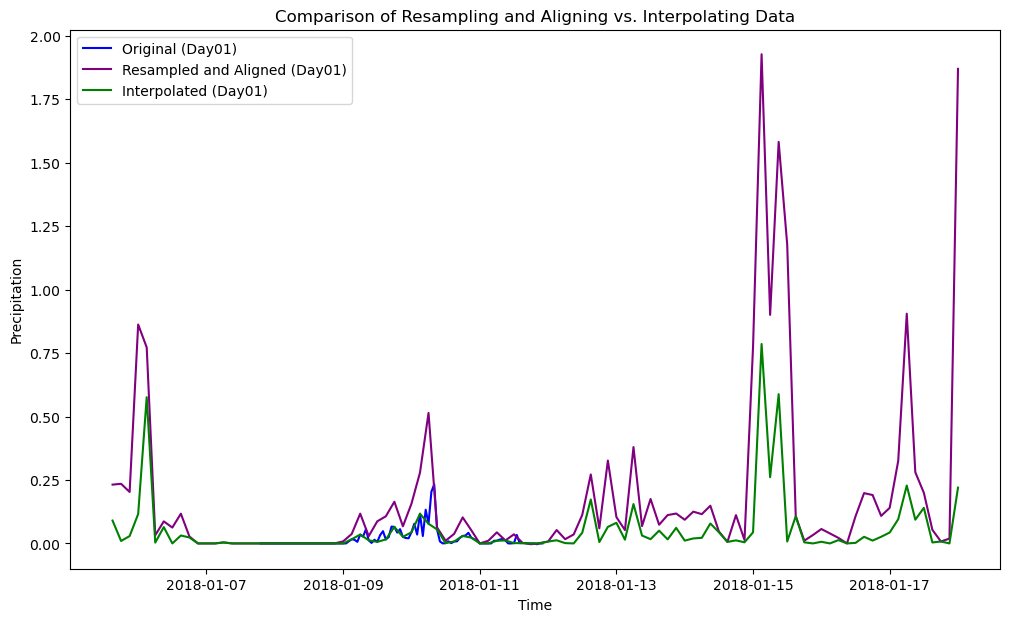

In [36]:
# Plot the comparisons
plt.figure(figsize=(12, 7))

# day 01 vs day05 (original)
plt.plot(data_day01.pr.time[150:250], data_day01.pr.isel(latitude=20, longitude=20)[150:250], label='Original (Day01)', color='blue')
#plt.plot(data_day05.pr.time[:100], data_day05.pr.isel(latitude=20, longitude=20)[:100], label='Original (Day05)', color='red', linestyle='dotted')
plt.plot(data_day01_aligned.pr.time[:100], data_day01_aligned.pr.isel(latitude=20, longitude=20)[:100], label='Resampled and Aligned (Day01)', color='purple')
plt.plot(day01_interp.pr.time[:100], day01_interp.pr.isel(latitude=20, longitude=20)[:100], label='Interpolated (Day01)', color='green')


# Adding title and labels
plt.title('Comparison of Resampling and Aligning vs. Interpolating Data')
plt.xlabel('Time')
plt.ylabel('Precipitation')

# Adding legends
plt.legend(loc='best')

# Show plot
plt.show()

In [40]:
data_day01_resampled=data_day01.resample(time='6H').sum()
data_day10_aligned, data_day01_aligned = xr.align(data_day10, data_day01_resampled, join='inner')

In [44]:
target = data_day10_aligned - data_day01_aligned

In [45]:
target

<xarray.Dataset>
Dimensions:    (time: 7265, longitude: 196, latitude: 125)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-10T18:00:00 ... 2022-12-31T18:00:00
  * longitude  (longitude) float32 -1.1 -1.0 -0.9 -0.8 ... 18.1 18.2 18.3 18.4
  * latitude   (latitude) float32 56.5 56.4 56.3 56.2 ... 44.4 44.3 44.2 44.1
Data variables:
    pr         (time, latitude, longitude) float64 -2.824 -2.528 ... 0.0 0.0

### 7. What happens with de_prepare_produce() function?

This is a check for integrity of this function using some examples

In [3]:
from py_env_train import *
import argparse
leadtime = "day10"
# Y_PRED has the same dimension as train_y, so I can just load it from training data:
# example for lead-time of 10:
date_start = "2018-01-01T13" # first day is not corrected
date_end = "2022-12-31T23"
delayh = int(24*(int(leadtime[3:])-1))+6
date_start2 = (pd.to_datetime(date_start) + pd.DateOffset(hours=delayh)).strftime("%Y-%m-%dT%H")

#load the training data
file="train_data_hourly_pr_['ADAPTER_DE05.day10.merged.nc']_['ADAPTER_DE05.day01.merged.nc']_MM_6__spatiotemporal_128.256_2018-01-01T13_2022-12-31T23_no_na_land.npz"
train_files=np.load(TRAIN_FILES+"/"+file)

Y_PRED = train_files["train_y"]
Y_PRED=Y_PRED[..., 0]
print("shape of Y_PRED is: " + str(Y_PRED.shape))

model_data_path = "/p/scratch/cesmtst/patakchiyousefi1/FORECASTLEAD_CESMTST_SCRATCH/HRES_PREP/ADAPTER_DE05."+str(leadtime)+".merged.nc"
reference_data_path = "/p/scratch/cesmtst/patakchiyousefi1/FORECASTLEAD_CESMTST_SCRATCH/HRES_PREP/ADAPTER_DE05.day01.merged.nc"


model = xr.open_dataset(model_data_path)
model = model["pr"].sel(time=slice(date_start2, date_end))

model

shape of Y_PRED is: (3634, 128, 256)


<xarray.DataArray 'pr' (time: 7264, latitude: 125, longitude: 196)>
[177968000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2018-01-11 ... 2022-12-31T18:00:00
  * longitude  (longitude) float32 -1.1 -1.0 -0.9 -0.8 ... 18.1 18.2 18.3 18.4
  * latitude   (latitude) float32 56.5 56.4 56.3 56.2 ... 44.4 44.3 44.2 44.1
Attributes:
    long_name:  Total precipitation
    units:      mm